In [202]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import OrderedDict

In [203]:
## N is the number of nodes in the graph
N = 10000

## d is the dimension of the vectors being assigned to each node
d = 5

## a is the power that the random number drawn from the Uniform(0,1) distribution is raised to
a = 16

In [204]:
## flip coin method to determine if an edge is present after computing probabilities
def flip_coin(p):
    num = np.random.random()
    if(num <= p):
        return True;
    else:
        return False;

## draws random number from uniform distribution and manipulates it
## distribution chosen such that for any a,d the inner product of any two matrices will be on the interval [0,1]
def get_random_unif(d, a):
    bound = pow(d, 1/(2*a))
    rand = pow(np.random.uniform(0, bound), a)
    return pow(rand, d)

##generate a random dot product graph
def generate_rdpm_graph(N, d, a):
    g = nx.Graph()
    
    ## define a list for vectors (also defined as lists) for each node
    prob_vectors = []
    
    ## add N nodes and N corresponding random vectors
    for i in range(0, N):
        ## add node to graph
        g.add_node(i)
        
        ## create list to store current vector to be added to prob_vectors
        currentVector = []
        for j in range(0, d):
            ## populate current vector with random numbers from defined distribution
            currentVector.append(get_random_unif(d, a))
        ## add current vector to prob_vectors
        prob_vectors.append(currentVector)

    ## for each pair of nodes, perform the dot product of their two vectors to calculate probability p
    ## flip a biased coin with probability p of being true, and add edges accordingly
    for i in range(0, N):
        for j in range(i, N):
            p = np.dot(prob_vectors[i], prob_vectors[j])
            if(flip_coin(p)):
                g.add_edge(i,j)
    
    ## return graph
    return g
        
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()   
    
def get_network_statistics(g):
    ## find largest connected component of the graph for diameter calculation
    ## there's a chance one or two nodes are degree 0 -- typically if their vector components are all very small
    connected_component = max(nx.connected_component_subgraphs(g), key=len)
    
    ## sum the degrees of all nodes to find the average degree
    sum = 0
    for j in g.nodes():
        sum += g.degree(j)
    average_degree = sum/N

    ## display # of edges, average degree, diameter (of largest connected component), and number of nodes in the graph
    print("Number of Edges: " + str(g.number_of_edges()))
    print("Average Node Degree: " + str(average_degree))
    print("Diameter: " + str(nx.diameter(connected_component)))
    print("Number of Nodes: " + str(len(g.nodes()))) 


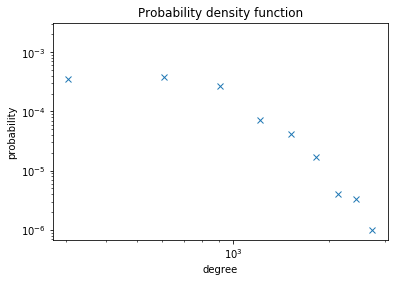

Number of Edges: 1514803
Average Node Degree: 302.9606


KeyboardInterrupt: 

In [205]:
## generate the graph
g = generate_rdpm_graph(N, d, a)
plot_degree_distribution(g)
get_network_statistics(g)
nx.draw_random(g)
